# Homework 1 solutions

1. **Long term planetary orbits**

First write down the equations of the orbit that we need to solve.

The acceleration is

$$a = {GM\over r^2}$$

towards the Sun, where $M$ is the mass of the Sun and $r$ is the Earth-Sun distance.

A circular orbit has $a = v^2/r$, so the velocity is given by $v^2 = GM/r$. 

First compute the orbit and make sure it looks like a circle:

nsteps = 1000
Delta E/E =  -1.9724690657386198e-05


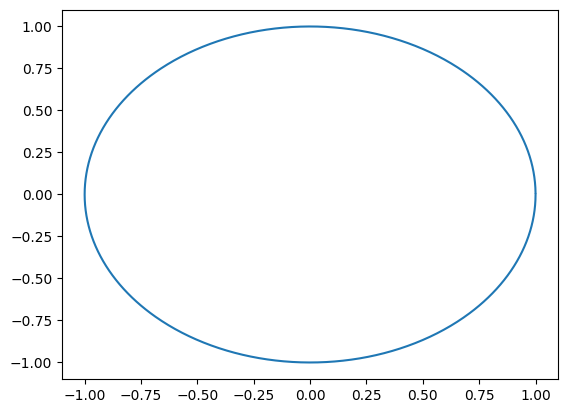

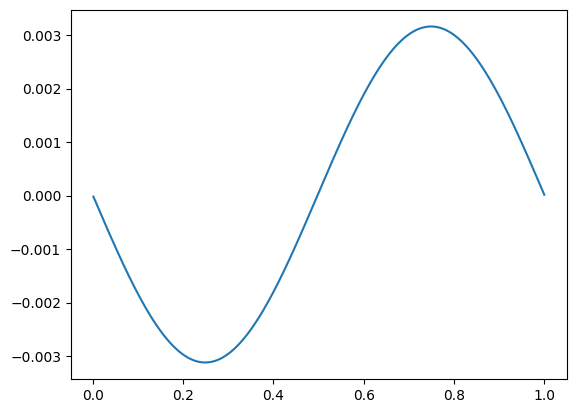

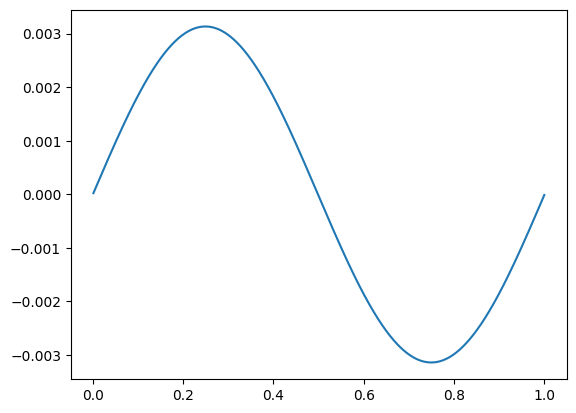

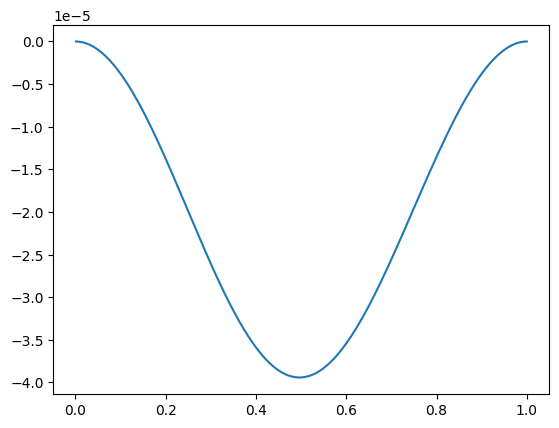

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
GM = 1.3271e20   # Gravitational parameter for the Sun (SI units)
rAU = 1.496e11    # AU = astronomical unit (Earth-Sun distance) in m
secperyear = 3600*24*365

# Compute the velocity and energy for a circular orbit
vEarth = np.sqrt(GM / rAU)
E0 = - 0.5 * GM / rAU

# Initial conditions
y = 0
x = rAU
vx = 0
vy = vEarth

# Timestep 
dt = 1e-3
nsteps = int(1.0 / dt)
dt *= secperyear
t=0.0

print('nsteps = %d' % (nsteps,))

t_vec = np.zeros(nsteps)
x_vec = np.zeros(nsteps)
y_vec = np.zeros(nsteps)
vx_vec = np.zeros(nsteps)
vy_vec = np.zeros(nsteps)

for i in range(nsteps):
    
    # compute the acceleration
    rr = np.sqrt(x**2 + y**2)
    ax = - GM * x / rr**3
    ay = - GM * y / rr**3
    
    # take the timestep
    # for semi-implicit Euler (second order), do the velocity update first
    # for explicit Euler (first order), do the position updates before the velocity
    vx = vx + ax * dt
    vy = vy + ay * dt
    x = x + vx * dt
    y = y + vy * dt

    t = t + dt

    # store the results
    t_vec[i] = t
    x_vec[i] = x
    y_vec[i] = y
    vx_vec[i] = vx
    vy_vec[i] = vy

    
rr = np.sqrt(x_vec**2 + y_vec**2)
energy = - GM / rr  + 0.5 * (vx_vec**2 + vy_vec**2)
print('Delta E/E = ', np.mean((energy-E0)/E0))

plt.plot(x_vec/rAU, y_vec/rAU)
plt.show()

plt.clf()
plt.plot(t_vec/secperyear, (np.sqrt(x_vec**2 + y_vec**2)-rAU)/rAU)
plt.show()

plt.clf()
plt.plot(t_vec/secperyear, (np.sqrt(vx_vec**2 + vy_vec**2)-vEarth)/vEarth)
plt.show()

plt.clf()
plt.plot(t_vec/secperyear, (energy-E0)/E0)
plt.show()


Now do this for different timesteps

[-1.  -1.5 -2.  -2.5 -3.  -3.5 -4.  -4.5 -5.  -5.5 -6.  -6.5 -7.  -7.5
 -8.  -8.5 -9. ]
-1.0 10 -0.07183938624734791 5.125999450683594e-05
-1.5 31 -0.0005620920258684807 5.2928924560546875e-05
-2.0 100 -2.5277116776878066e-07 0.0001468658447265625
-2.5 316 -1.0393759622775783e-08 0.0004467964172363281
-3.0 1000 -2.1997291674745818e-10 0.0010802745819091797
-3.5 3162 -2.6377522768445045e-11 0.002825021743774414
-4.0 10000 -2.093522445015285e-12 0.008417129516601562
-4.5 31622 -2.2576017123215092e-13 0.021621227264404297
-5.0 100000 -3.8836124694102156e-14 0.057350873947143555
-5.5 316227 -6.745928926103558e-14 0.1693429946899414
-6.0 1000000 1.5937593040555416e-13 0.5223250389099121
-6.5 3162277 2.394670387712458e-13 1.6560380458831787
-7.0 10000000 -9.946885639645126e-13 5.324723243713379
-7.5 31622776 -1.84908330723476e-13 16.520429134368896
-8.0 100000000 6.651862188090161e-13 51.796481132507324
-8.5 316227766 1.1378043867991797e-12 162.00765204429626
-9.0 1000000000 -1.0711513838639

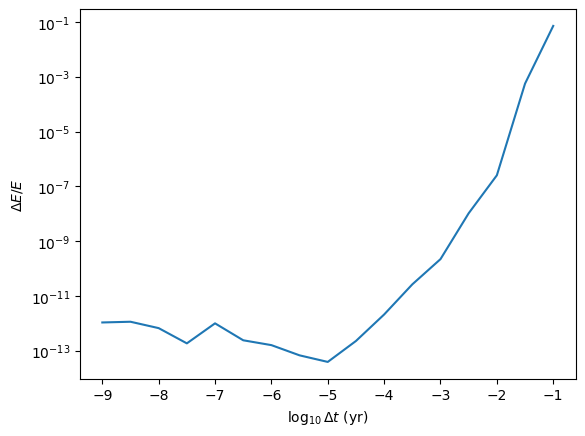

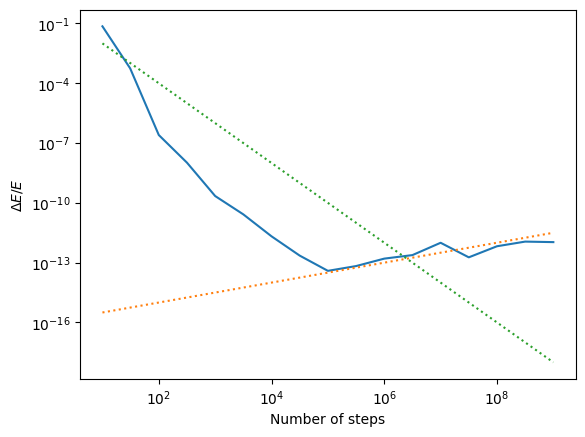

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

def evolve(dt):
    
    # Initial conditions
    y = 0.0
    x = rAU
    vx = 0.0
    vy = vEarth

    nsteps = int(10**(0-dt))
    dt = 10.0**dt * secperyear
    
    for i in range(nsteps):
            
        # compute the acceleration
        rr = (x**2 + y**2)**(3/2)
        ax = - GM * x / rr
        ay = - GM * y / rr
        
        # take the timestep
        # for semi-implicit Euler (second order), do the velocity update first
        # for explicit Euler (first order), do the position updates before the velocity
        vx = vx + ax * dt
        vy = vy + ay * dt

        x = x + vx * dt
        y = y + vy * dt

    energy = - GM / (x**2 + y**2)**0.5  + 0.5 * (vx**2 + vy**2)
     
    return energy, nsteps

# Constants
GM = 1.3271e20   # Gravitational parameter for the Sun (SI units)
rAU = 1.496e11    # AU = astronomical unit (Earth-Sun distance) in m
secperyear = 3600*24*365

# Compute the velocity and energy for a circular orbit
vEarth = np.sqrt(GM / rAU)
E0 = - 0.5 * GM / rAU

# The different values of log10 timestep to try
dt_vals = np.arange(-1,-9.1,-0.5)
print(dt_vals)

E_vals = np.array([])
n_vals = np.array([], dtype =np.int_)
for dt in dt_vals:
    t0 = time.time()
    E, nsteps = evolve(dt)
    t1 = time.time()
    print(dt, nsteps, (E-E0)/E0, t1-t0)
    E_vals = np.append(E_vals, np.abs((E-E0)/E0))
    n_vals = np.append(n_vals, nsteps)

plt.plot(dt_vals, E_vals)
plt.yscale('log')
plt.xlabel(r'$\log_{10}\Delta t\ (\mathrm{yr})$')
plt.ylabel(r'$\Delta E/E$')
plt.show()

plt.clf()
plt.plot(n_vals, E_vals)
plt.plot(n_vals, 1e-16 * np.sqrt(n_vals), ":")
plt.plot(n_vals, 1/n_vals**2, ":")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'Number of steps')
plt.ylabel(r'$\Delta E/E$')
plt.show()

2. **Interpolation and thermodynamics**

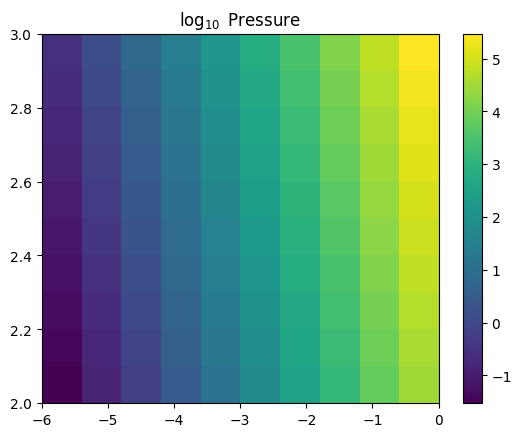

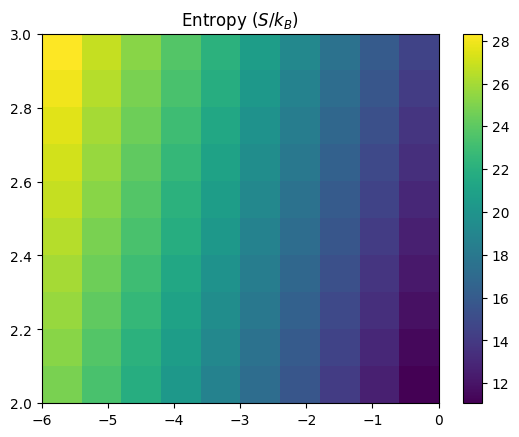

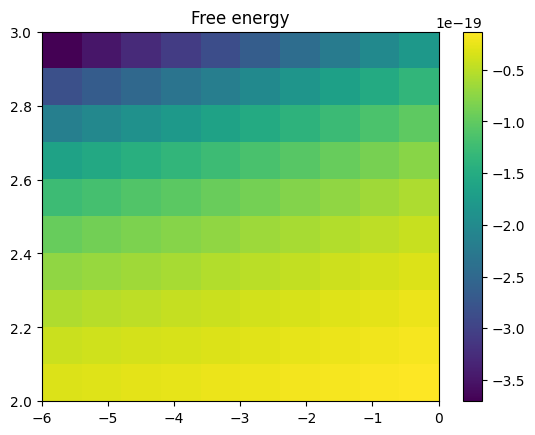

In [2]:
# First calculate P, S, and F on a coarse grid and make some color
# maps to show what they look like

import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

def P(rho, T):
    n = rho / (28*mu)
    return n * kB * T

def S(rho, T):
    n = rho / (28*mu)
    nQ = (28*mu*kB*T/(2*np.pi*hbar**2))**1.5
    return kB * (2.5 - np.log(n/nQ))

def F(rho, T):
    n = rho / (28*mu)
    nQ = (28*mu*kB*T/(2*np.pi*hbar**2))**1.5
    return kB * T * (np.log(n/nQ) - 1.0)

# constants
mu = 1.66e-27 # kg
kB = 1.381e-23 # SI
hbar = 6.626e-34 # SI

# grid in log T and log rho
Tp = np.linspace(2,3,10)
rhop = np.linspace(-6,0.0,10)
Tgrid, rhogrid = np.meshgrid(Tp, rhop, indexing='ij')
Pgrid = np.log10(P(10**rhogrid, 10**Tgrid))
Sgrid = S(10**rhogrid, 10**Tgrid)/kB
Fgrid = F(10**rhogrid, 10**Tgrid)

plt.imshow(Pgrid, aspect='auto', origin='lower', extent=(rhop[0],rhop[-1],Tp[0],Tp[-1]), 
           interpolation='none')
plt.title(r'$\log_{10}$ Pressure')
plt.colorbar()
plt.show()

plt.clf()
plt.imshow(Sgrid, aspect='auto', origin='lower', extent=(rhop[0],rhop[-1],Tp[0],Tp[-1]), 
           interpolation='none')
plt.title(r'Entropy ($S/k_B$)')
plt.colorbar()
plt.show()

plt.clf()
plt.imshow(Fgrid, aspect='auto', origin='lower', extent=(rhop[0],rhop[-1],Tp[0],Tp[-1]), 
           interpolation='none')
plt.title(r'Free energy')
plt.colorbar()
plt.show()

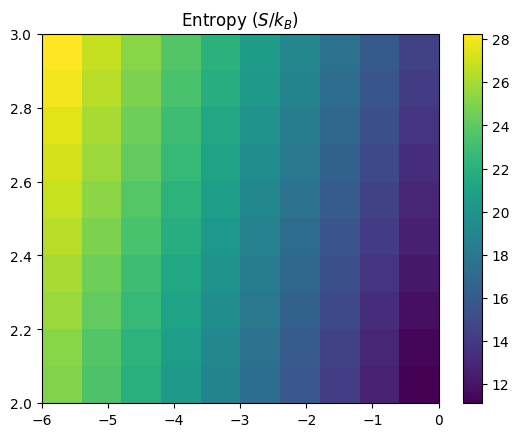

In [3]:
# Here we calculate the entropy by differentiating the free energy

Finterp = scipy.interpolate.RectBivariateSpline(Tp,rhop,Fgrid)
SS = Finterp.partial_derivative(1,0)
#dSdrho = Sinterp.partial_derivative(0,1)

plt.clf()
plt.imshow(SS(Tp,rhop)/ (10.0**Tgrid * np.log(10) * kB) * -1.0, aspect='auto', origin='lower', extent=(rhop[0],rhop[-1],Tp[0],Tp[-1]),
           interpolation='none')
#plt.imshow(Sgrid, aspect='auto', origin='lower', extent=(rhop[0],rhop[-1],Tp[0],Tp[-1]), 
#         interpolation='none')
plt.title(r'Entropy ($S/k_B$)')
plt.colorbar()
plt.show()


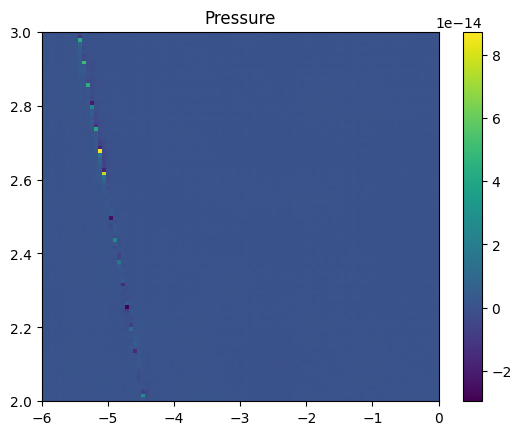

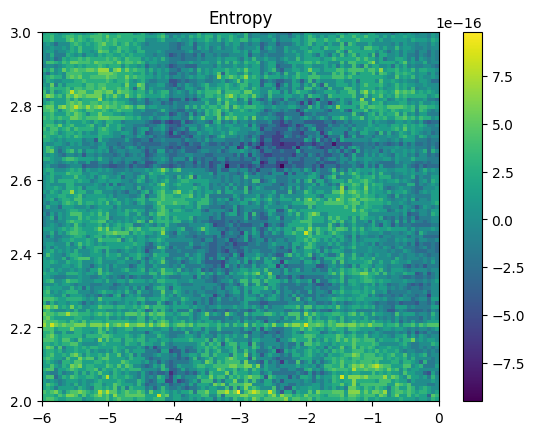

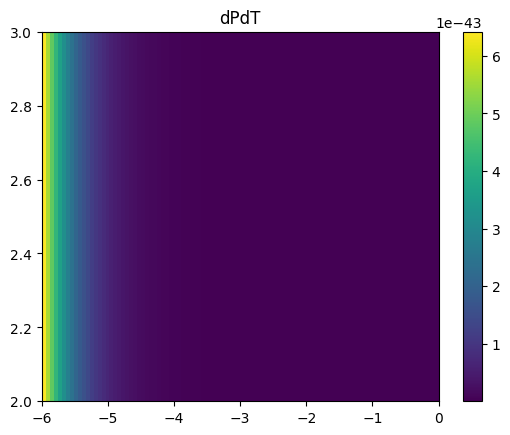

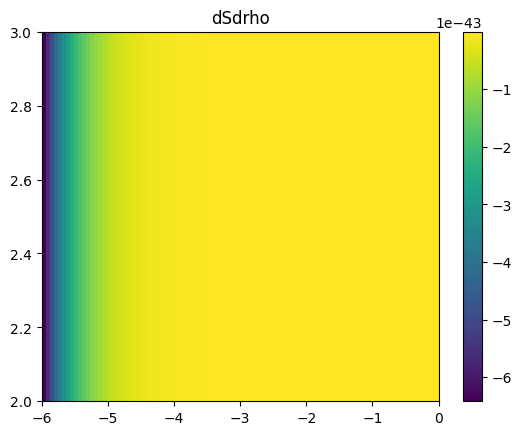

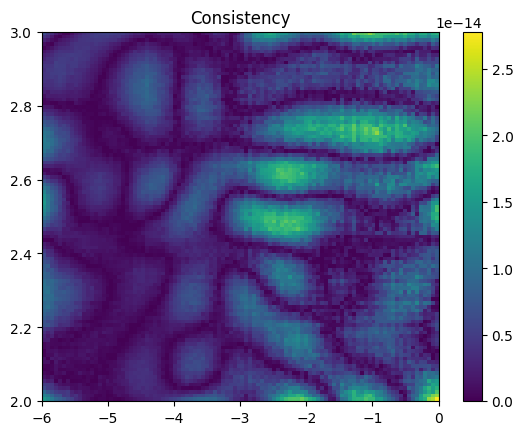

-1.390557629454562e-14


In [4]:
# Now interpolate P and S, plot the fractional errors in the interpolation
# and check for thermodynamic consistency using the derivatives

#Pinterp = scipy.interpolate.RegularGridInterpolator((Tp,rhop),Pgrid, bounds_error=False, fill_value=None)
#Sinterp = scipy.interpolate.RegularGridInterpolator((Tp,rhop),Sgrid, bounds_error=False, fill_value=None)

Pinterp = scipy.interpolate.RectBivariateSpline(Tp,rhop,Pgrid)
Sinterp = scipy.interpolate.RectBivariateSpline(Tp,rhop,Sgrid)

dPdT = Pinterp.partial_derivative(1,0)
dSdrho = Sinterp.partial_derivative(0,1)

# now compute the function on a finer grid
Tp2 = np.linspace(2,3,100)
rhop2 = np.linspace(-6,0.0,100)
Tgrid2, rhogrid2 = np.meshgrid(Tp2, rhop2, indexing='ij')
ngrid2 = 10.0**rhogrid2 / (28*mu)
Pgrid2 = np.log10(P(10**rhogrid2, 10**Tgrid2))
Sgrid2 = S(10**rhogrid2, 10**Tgrid2)/kB

# plot the fractional error
plt.imshow((Pinterp(Tp2,rhop2)-Pgrid2)/Pgrid2, origin='lower',
          extent=(rhop2[0],rhop2[-1],Tp2[0],Tp2[-1]), aspect='auto')
plt.title('Pressure')
plt.colorbar()
plt.show()

plt.clf()
plt.imshow((Sinterp(Tp2,rhop2)-Sgrid2)/Sgrid2, origin='lower',
           extent=(rhop2[0],rhop2[-1],Tp2[0],Tp2[-1]), aspect='auto')
plt.title('Entropy')
plt.colorbar()
plt.show()

plt.clf()
f1 = 10**Pinterp(Tp2,rhop2) * dPdT(Tp2,rhop2)/ 10**Tgrid2 / ngrid2**2
plt.imshow(f1, origin='lower',
           extent=(rhop2[0],rhop2[-1],Tp2[0],Tp2[-1]), aspect='auto')
plt.title('dPdT')
plt.colorbar()
plt.show()

plt.clf()
f2 = kB * dSdrho(Tp2,rhop2)/(np.log(10)*ngrid2)
plt.imshow(f2, origin='lower',
           extent=(rhop2[0],rhop2[-1],Tp2[0],Tp2[-1]), aspect='auto')
plt.title('dSdrho')
plt.colorbar()
plt.show()

plt.clf()
plt.imshow(np.abs((f1+f2)/f1), origin='lower',
           extent=(rhop2[0],rhop2[-1],Tp2[0],Tp2[-1]), aspect='auto')
plt.title('Consistency')
plt.colorbar()
plt.show()

print(np.min((f1+f2)/(f1-f2)))
